In [101]:
from IPython.core.display import display, HTML
display(HTML('<h1>XGBoost Model for Prediction of Shark Attacks</h1>'))

In [50]:

display(HTML('<h3>Importing the required libraries </h3>'))


In [5]:
import numpy as np
import xgboost as xgb
import pandas as pd

In [49]:

display(HTML('<h3>Import the dataset as a dataframe and print it to check the structure</h3>'))

In [15]:
sharksdata= pd.read_csv("/Users/saikrishna/Downloads/sharks.csv",encoding='ISO-8859-1')
sharksdata.head()

,X.2,X.1,X,Id,Date,ID,TurtleExactCountSC,turtleexactdiscretizeSC,TurtleExactCountNC,TurtleExactCombined,...,StationPressure_minmax,WindSpeed_minmax,Salinity_minmax,Turbidity_minmax,Dissolved02_minmax,WaterTemp_minmax,Turtle_minmax,Crablandings_minmax,turbidity_kmeans_binning,turbidty_domain
0,1,1,1,4,5/4/09,25,0.0,Low,0.0,0,...,0.578947,0.333333,0.636021,0.032566,0.741354,0.576733,0.000000,0.933566,Low,Low
1,2,2,2,5,5/5/09,33,0.0,Low,0.0,0,...,0.649123,0.202614,0.552312,0.037936,0.675088,0.477558,0.000000,0.114510,Low,Medium
2,3,3,3,7,5/7/09,49,1.0,Low,0.0,0,...,0.508772,0.405229,0.496314,0.027615,0.703665,0.498185,0.000000,0.925699,Low,Low
3,4,4,4,8,5/8/09,57,0.0,Low,0.0,0,...,0.508772,0.267974,0.579198,0.020119,0.788776,0.575743,0.000000,0.296329,Low,Low
4,5,5,5,11,5/11/09,81,2.0,Low,0.0,1,...,0.614035,0.385621,0.597837,0.066004,0.822323,0.627393,0.004785,0.994755,Low,Medium


In [16]:
sharksdata

,X.2,X.1,X,Id,Date,ID,TurtleExactCountSC,turtleexactdiscretizeSC,TurtleExactCountNC,TurtleExactCombined,...,StationPressure_minmax,WindSpeed_minmax,Salinity_minmax,Turbidity_minmax,Dissolved02_minmax,WaterTemp_minmax,Turtle_minmax,Crablandings_minmax,turbidity_kmeans_binning,turbidty_domain
0,1,1,1,4,5/4/09,25,0.0,Low,0.0,0,...,0.578947,0.333333,0.636021,0.032566,0.741354,0.576733,0.000000,0.933566,Low,Low
1,2,2,2,5,5/5/09,33,0.0,Low,0.0,0,...,0.649123,0.202614,0.552312,0.037936,0.675088,0.477558,0.000000,0.114510,Low,Medium
2,3,3,3,7,5/7/09,49,1.0,Low,0.0,0,...,0.508772,0.405229,0.496314,0.027615,0.703665,0.498185,0.000000,0.925699,Low,Low
3,4,4,4,8,5/8/09,57,0.0,Low,0.0,0,...,0.508772,0.267974,0.579198,0.020119,0.788776,0.575743,0.000000,0.296329,Low,Low
4,5,5,5,11,5/11/09,81,2.0,Low,0.0,1,...,0.614035,0.385621,0.597837,0.066004,0.822323,0.627393,0.004785,0.994755,Low,Medium
5,6,6,6,14,5/14/09,105,15.0,Low,1.0,8,...,0.859649,0.228758,0.593136,0.010774,0.695589,0.304455,0.038278,0.047203,Low,Low
6,7,7,7,16,5/16/09,121,9.0,Low,3.0,6,...,0.771930,0.196078,0.595940,0.011960,0.777594,0.580858,0.028708,0.119755,Low,Low
7,8,8,8,18,5/18/09,137,7.0,Low,0.0,3,...,0.789474,0.882353,0.431409,0.050384,0.693104,0.000000,0.014354,0.912587,Low,Medium
8,9,9,9,27,5/27/09,209,23.0,Low,3.0,13,...,0.385965,0.098039,0.637258,0.009589,0.509215,0.590594,0.062201,0.382867,Low,Low
9,10,10,10,29,5/29/09,225,48.0,Low,14.0,31,...,0.280702,0.346405,0.638330,0.020567,0.375854,0.650990,0.148325,0.277972,Low,Low


In [47]:
display(HTML('<h3>Data Pre-Processing </h3>'))



In [48]:
display(HTML('<h3>Dropping the redundant columns first</h3>'))




In [20]:
sharksdata.drop(['X.2','X.1','X',],axis=1,inplace=True)

In [21]:
sharksdata.head()

,Id,Date,ID,TurtleExactCountSC,turtleexactdiscretizeSC,TurtleExactCountNC,TurtleExactCombined,TurtleexactdiscretizeNC,TurtleAttackActivity,TurtleAttackActivityDiscretized,...,StationPressure_minmax,WindSpeed_minmax,Salinity_minmax,Turbidity_minmax,Dissolved02_minmax,WaterTemp_minmax,Turtle_minmax,Crablandings_minmax,turbidity_kmeans_binning,turbidty_domain
0,4,5/4/09,25,0.0,Low,0.0,0,Low,NaN,NaN,...,0.578947,0.333333,0.636021,0.032566,0.741354,0.576733,0.000000,0.933566,Low,Low
1,5,5/5/09,33,0.0,Low,0.0,0,Low,NaN,NaN,...,0.649123,0.202614,0.552312,0.037936,0.675088,0.477558,0.000000,0.114510,Low,Medium
2,7,5/7/09,49,1.0,Low,0.0,0,Low,NaN,NaN,...,0.508772,0.405229,0.496314,0.027615,0.703665,0.498185,0.000000,0.925699,Low,Low
3,8,5/8/09,57,0.0,Low,0.0,0,Low,NaN,NaN,...,0.508772,0.267974,0.579198,0.020119,0.788776,0.575743,0.000000,0.296329,Low,Low
4,11,5/11/09,81,2.0,Low,0.0,1,Low,NaN,NaN,...,0.614035,0.385621,0.597837,0.066004,0.822323,0.627393,0.004785,0.994755,Low,Medium


In [45]:

display(HTML('<h3>Removing Duplicates</h3>'))

In [44]:
df_no_dups = sharksdata.drop_duplicates()

print(df_no_dups.shape)

(186, 69)


In [51]:
display(HTML('<h3> For Numerical variables, the next step is to replace the Missing values with the mean</h3>'))

In [25]:
mean1 = sharksdata.Temperature.mean()
print(mean1)
# Replace all the missing values in the Temperature column with the mean
sharksdata['Temperature'] = sharksdata.Temperature.fillna(mean1)

28.167617702307684


In [26]:
mean1 = sharksdata.Turbidity.mean()
print(mean1)
# Replace all the missing values in the DissovedO2 column with the mean
sharksdata['Turbidity'] = sharksdata.Turbidity.fillna(mean1)

38.295837333923075


In [27]:
mean1 = sharksdata.DissovedO2.mean()
print(mean1)
# Replace all the missing values in the DissovedO2 column with the mean
sharksdata['DissovedO2'] = sharksdata.DissovedO2.fillna(mean1)

67.67899683343403


In [28]:
mean1 = sharksdata.WindSpeed.mean()
print(mean1)
# Replace all the missing values in the windspeedcolumn with the mean
sharksdata['WindSpeed'] = sharksdata.WindSpeed.fillna(mean1)

6.551648351648349


In [29]:
mean1 = sharksdata.Salinity.mean()
print(mean1)
# Replace all the missing values in the Salinity column with the mean
sharksdata['Salinity'] = sharksdata.Salinity.fillna(mean1)

26.199711008340675


In [43]:

display(HTML('<h3>Here, we are not replacing the NA values with zeros because when the attack didnt occur, there wont be any data. so , we should not replace NA with zero </h3>'))

In [42]:

display(HTML('<h3>Data Visualizations</h3>'))



In [41]:

display(HTML('<h3>Import Required libraries for visualizations : </h3>'))

In [39]:

#import the required libraries
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
style.use('ggplot')

In [40]:
display(HTML('<h3>Box Plot between Temperature and Attack</h3>'))

/Users/saikrishna/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


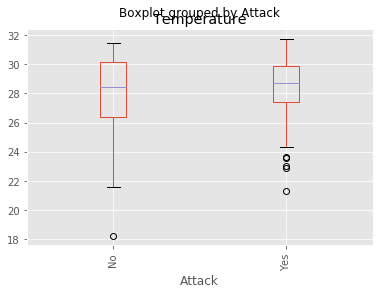

In [38]:
#boxplot 
sharksdata.boxplot(column='Temperature', by='Attack', rot=90)
#Display the plot
plt.show()

In [52]:
display(HTML('<h3>Box Plot between Turbidity and Attack</h3>'))

/Users/saikrishna/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


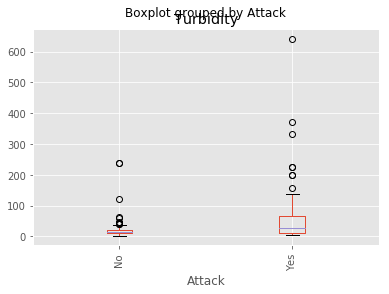

In [53]:
#boxplot 
sharksdata.boxplot(column='Turbidity', by='Attack', rot=90)
#Display the plot
plt.show()

In [54]:
display(HTML('<h3>Box Plot between Salinity and Attack</h3>'))

/Users/saikrishna/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


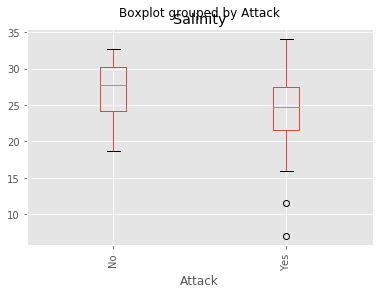

In [55]:
#boxplot 
sharksdata.boxplot(column='Salinity', by='Attack', rot=90)
#Display the plot
plt.show()

In [57]:
display(HTML('<h3>Scatter plot between the precipitation value and Dissolved Oxygen</h3>'))

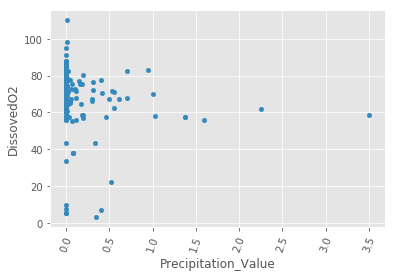

In [65]:
#Scatter plot 
sharksdata.plot(kind='scatter', x='Precipitation_Value', y='DissovedO2', rot=70)
#Display the plot
plt.show()

In [66]:
display(HTML('<h3>From the above plot, we can infer that Dissolved Oxygen is high when the precipitation value is low.</h3>'))

In [58]:
display(HTML('<h3>Scatter plot between the Windspeed and Attack</h3>'))

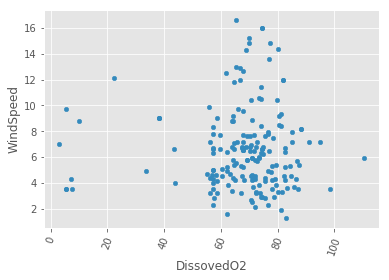

In [63]:
#Scatter plot 
sharksdata.plot(kind='scatter', x='DissovedO2', y='WindSpeed', rot=70)
#Display the plot
plt.show()

In [81]:
display(HTML('<h3>From the above plot, we can infer that Dissolved Oxygen lies in between 60 to 80 most of the time.</h3>'))

In [82]:
display(HTML('<h3>Selecting the columns to train the model and ensuring everything is correct.</h3>'))

In [80]:
columns_target=['Attack']

columns_train=['Precipitation_Value','StationPressure','WindSpeed','Salinity','Turbidity','Temperature','DissovedO2']
X=sharksdata[columns_train]
y=sharksdata[columns_target]
print(y.shape)
print(X.shape)

(186, 1)
(186, 7)


In [83]:
display(HTML('<h3>The Next step is to split the data into training and test data .</h3>'))

In [87]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [88]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

/Users/saikrishna/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/saikrishna/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [89]:
display(HTML('<h3>Setting the Parameters for the XGBoost Classifier.</h3>'))

In [90]:
param = {
    'max_depth': 9,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 55}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations

In [92]:
model.fit(X_train, y_train)

/Users/saikrishna/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/saikrishna/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [93]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [95]:
y_pred = model.predict(X_test)
prediction=[(value) for value in y_pred]

In [97]:
from sklearn.metrics import accuracy_score

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x1a180250b8>>
Traceback (most recent call last):
  File "/Users/saikrishna/anaconda3/lib/python3.6/site-packages/xgboost-0.7-py3.6.egg/xgboost/core.py", line 368, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


In [98]:
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.32%
